In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

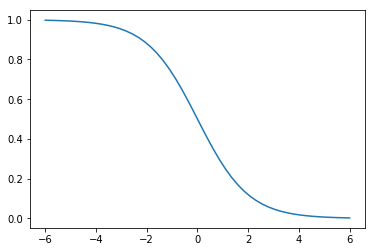

In [2]:
x=np.linspace(-6,6)
y=1/(1+np.exp(x))
axes=plt.figure()
plt.plot(x,y)

In [3]:
f=open('E:/study/数据集/creditcard.csv')
data=pd.read_csv(f)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

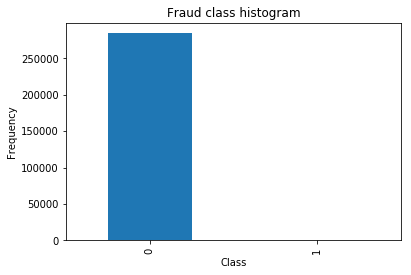

In [4]:
counts_classes=pd.value_counts(data['Class'],sort=True).sort_index()
counts_classes.head()
counts_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

**改进不平衡数据 标准化**

In [5]:
from sklearn.preprocessing import StandardScaler
data['normAmount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))##将数据标准化后，换成一列
#data.head()
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


**下采样**

In [6]:
##特征
X=data.loc[:,data.columns != 'Class']
y=data.loc[:,data.columns =='Class']
#X.head()
#y.head()
number_records_fraud=len(data[data.Class==1])

##异常样本的索引
fraud_indices=np.array(data[data.Class==1].index)
##正常样本的索引
normal_indices=data[data.Class==0].index
#在正常样本中，随机采样出指定个数的样本，并取索引
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
##把索引拿到手
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
##根据索引拿样本点
under_sample_data=data.iloc[under_sample_indices,:]
X_undersample=under_sample_data.loc[:,under_sample_data.columns!='Class']
y_undersample=under_sample_data.loc[:,under_sample_data.columns=='Class']
##打印采样后正负样本比例
print('正常样本比例：',len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print('异常比例：',len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print('下采样总体的样本个数：',len(under_sample_data))


正常样本比例： 0.5
异常比例： 0.5
下采样总体的样本个数： 984


**交叉验证**

In [7]:
##数据切分模块
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)##随机种子
print('原始数据训练集样本数：',len(X_train))
print('原始数据试集样本数',len(X_test))
print('原始数据样本总数：',len(X_test)+len(X_train))

print('\n\n')



X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample=train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)

print('下采样训练集样本数：',len(X_train_undersample))
print('下采样测试集样本数',len(X_test_undersample))
print('下采样样本总数：',len(X_test_undersample)+len(X_train_undersample))


原始数据训练集样本数： 199364
原始数据试集样本数 85443
原始数据样本总数： 284807



下采样训练集样本数： 688
下采样测试集样本数 296
下采样样本总数： 984


In [22]:
X_train_undersample.values

array([[-1.86,  3.44, -4.47, ...,  0.42,  0.21, -0.35],
       [ 1.21, -0.05, -0.09, ..., -0.12, -0.01, -0.17],
       [ 2.08, -0.05, -1.39, ..., -0.03, -0.06, -0.35],
       ...,
       [-3.67, -3.83,  1.18, ...,  0.22, -0.13, -0.21],
       [-1.23,  1.87, -2.63, ..., -0.21, -0.05, -0.35],
       [-1.24,  2.  , -1.16, ...,  0.11,  0.14, -0.29]])

In [24]:
y_train_undersample.values.ravel()

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

**准确率**



 **Accuracy=(TP+TN)/(TP+TN+FP+FN) **
 

**召回率（recall）=TP/TP+FN:正例中有多少预测对的**

**精度（precision）=TP/TP+FP:被分为正例中实际为正例的比例**

**不同的参数**

In [9]:
from sklearn.linear_model import LogisticRegression  #
from sklearn.model_selection import KFold, cross_val_score  #
from sklearn.metrics import confusion_matrix,recall_score,classification_report #

In [12]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(5,shuffle=False)
    fold.get_n_splits(len(y_train_data))
    c_param_range=[0.01,0.1,1,10,100]
    ##展示出来  
    results_table=pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall score'])
    results_table['C_parameter']=c_param_range
    ##KFold表示K折较差验证，得到两个索引集合：训练集=indices[0],indices[1]
    
    j=0
    for c_param in c_param_range:
        print('----------------')
        print('正则惩罚力度：',c_param)
        print('----------------')
        print(' ')
        recall_accs=[]
        ##一步步分解来执行较差验证
        for iteration,indices in enumerate(fold,start=1):
            lr=LogisticRegression(C=c_param,penalty='11')
            ##训练模型
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc=recall_score(y_train_data.iloc[indices[1],:].values,y_undersample)
            ##一会还要算平均，所以把每一步的结果都先保存起来
            recall_accs.append(recall_acc)
            print('Interation',iteration,':召回率：',recall_acc)
    ##计算平均结果
        results_table.loc[j,'Mean recall score']=np.mean(recall_accs)
        j+=1
        print(' ')
        print('平均召回率',np.mean(recall_accs))
    ##找到最好的参数，哪一个Recall高自然就好
    best_c=results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']



    print('************')
    print('最好的参数：',best_c)
    print('************')
    return best_c
best_c=printing_Kfold_scores(X_train_undersample,y_train_undersample)



----------------
正则惩罚力度： 0.01
----------------
 


TypeError: 'KFold' object is not iterable

**混淆矩阵0：正常1：异常**

In [15]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

D:\cainiao\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9183673469387755


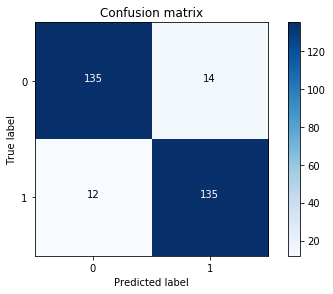

In [17]:
import itertools
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

D:\cainiao\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.9047619047619048


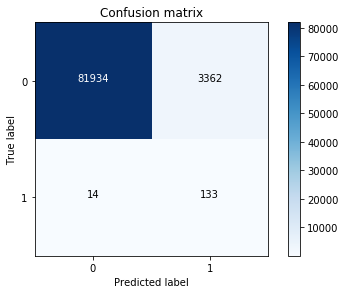

In [19]:
import itertools
lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

**不同阈值的影响**

D:\cainiao\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset: 1.0


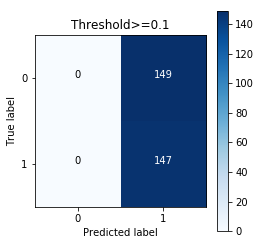

Recall metric in the testing dataset: 1.0


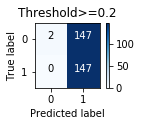

Recall metric in the testing dataset: 0.9931972789115646


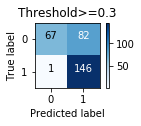

Recall metric in the testing dataset: 0.9523809523809523


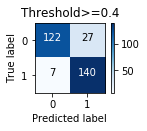

Recall metric in the testing dataset: 0.9115646258503401


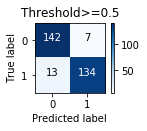

Recall metric in the testing dataset: 0.8707482993197279


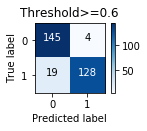

Recall metric in the testing dataset: 0.8503401360544217


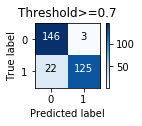

Recall metric in the testing dataset: 0.8299319727891157


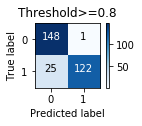

Recall metric in the testing dataset: 0.8027210884353742


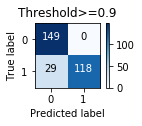

In [34]:
import itertools
lr = LogisticRegression(C = 0.01, penalty = 'l2')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
##指定不同阈值
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))
j=1
for i in thresholds:
    y_test_predictions_high_recall=y_pred_undersample_proba[:,1]>i
    plt.subplot(3,3,j)
    j+=1
    cnf_matrix=confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print('Recall metric in the testing dataset:', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    class_names = [0,1]

    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold>=%s'%i)
    plt.show()


**过采样**

**对于每一个异常样本，首先找到离其最近的同类样本，然后在他们的距离上，取0~1中的一个随机小数作为比例，再加到原始数据点上，就得到心得异常样本。
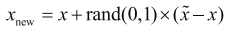**

In [30]:
y_test_predictions_high_recall

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,

In [33]:
f=open('E:/study/数据集/creditcard.csv')
credit_cards=pd.read_csv(f)
columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)
 
features=credit_cards[features_columns]
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)
oversampler=SMOTE(random_state=0)  #实例化参数，只对训练集增广，测试集不动
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)# 使 0 和 1 样本相等
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)
 
# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)
 
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
 
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

NameError: name 'SMOTE' is not defined